**Test Case** - Predicting the profits of startups based on factors like R&D Spending, Marketing Spending and Number of Employees. Use Backward Elimination to select significant features.

In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Importing the data

startup = pd.read_csv("50_Startups.csv")
startup.head(7)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51



**Profile of the data**
---



No. of Rows, column, null values, duplicated values, data type,databyte

In [ ]:
# Get the information of the data

startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


obs - The DataFrame has 50 rows, 5 columns (4 numerical and 1 categorical), with no missing values.

In [ ]:
# Duplicated Values

startup.duplicated().sum()

0

obs - No Duplicated values prosent in data.

In [ ]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
# Numerical Variable

numerical_feature = [i for i in startup.columns if startup[i].dtypes != "O"]
startup[numerical_feature].head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [ ]:
# Categorical Column

categorical_features = [i for i in startup.columns if startup[i].dtypes == "O"]
startup[categorical_features].head()

,State
0,New York
1,California
2,Florida
3,New York
4,Florida


# **Statistical Analysis**

Mean, Median, Mode, variance, standard deviation, covariance, skewness,correlation, IQR.

In [ ]:
# Statistics

startup.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,NaN,NaN,NaN,73721.6156,45902.256482,0.0,39936.37,73051.08,101602.8,165349.2
Administration,50.0,NaN,NaN,NaN,121344.6396,28017.802755,51283.14,103730.875,122699.795,144842.18,182645.56
Marketing Spend,50.0,NaN,NaN,NaN,211025.0978,122290.310726,0.0,129300.1325,212716.24,299469.085,471784.1
State,50,3,New York,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profit,50.0,NaN,NaN,NaN,112012.6392,40306.180338,14681.4,90138.9025,107978.19,139765.9775,192261.83


Obs - The dataset provide the statistics information of the data.

In [ ]:
# Correlation

startup[numerical_feature].corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


obs - Profit is most strongly influenced by R&D Spend and Marketing Spend, with Administration having minimal impact.

In [ ]:
# Covariance

startup[numerical_feature].cov()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,2.107017e+09,3.111739e+08,4.065495e+09,1.800007e+09
Administration,3.111739e+08,7.849973e+08,-1.101690e+08,2.266673e+08
Marketing Spend,4.065495e+09,-1.101690e+08,1.495492e+10,3.685779e+09
Profit,1.800007e+09,2.266673e+08,3.685779e+09,1.624588e+09


obs - The R&D Spend and Marketing Spend is shows good relationship in data.

In [ ]:
# Skewness

startup[numerical_feature].skew()

,0
R&D Spend,0.164002
Administration,-0.489025
Marketing Spend,-0.046472
Profit,0.023291


obs - The R&D Spend is positively skewed and Marketing Spend and Administration are negatively skewed

In [ ]:
 startup.groupby('State').median()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,63408.860,121597.550,174999.30,97427.84
Florida,74661.715,115728.745,253176.18,109543.12
New York,77044.010,127382.300,205517.64,108552.04


In [ ]:
startup.groupby('State').mean()

,R&D Spend,Administration,Marketing Spend,Profit
State,,,,
California,64657.674118,120746.507059,182540.929412,103905.175294
Florida,80724.016250,121768.897500,247323.551250,118774.024375
New York,76195.062353,121543.470588,205346.015882,113756.446471


In [ ]:
for col in categorical_features:
    print(f"Value counts for {col}:")
    print(startup[col].value_counts())
    print()

Value counts for State:
State
New York      17
California    17
Florida       16
Name: count, dtype: int64



In [ ]:
# The unique values in the data

print("Unique values per column")
startup.nunique().sort_values(ascending = True)

Unique values per column


,0
State,3
Marketing Spend,48
R&D Spend,49
Administration,50
Profit,50


In [ ]:
from scipy.stats import normaltest
normaltest(startup['R&D Spend'])

NormaltestResult(statistic=2.5283987387721436, pvalue=0.28246535604463124)

obs - The p-value (0.282) from the normality test indicates that the data does not significantly deviate from a normal distribution (assuming a significance level of 0.05).

<Axes: xlabel='R&D Spend', ylabel='Density'>

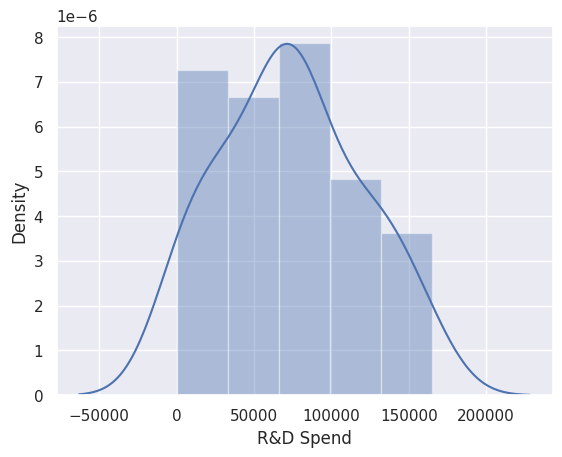

In [ ]:
sns.distplot(startup['R&D Spend'])

In [ ]:
normaltest(startup['Administration'])

NormaltestResult(statistic=2.484488294064544, pvalue=0.2887355253581867)

obs - The p-value (0.289) from the normality test suggests that there is no significant deviation from a normal distribution, meaning the data can be considered approximately normal.

<Axes: xlabel='Administration', ylabel='Density'>

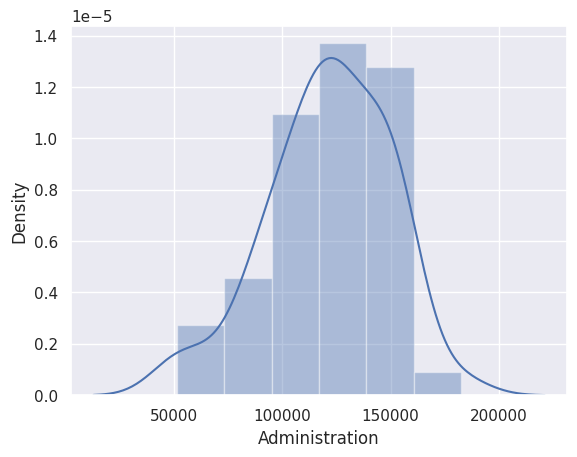

In [ ]:
sns.distplot(startup['Administration'])

In [ ]:
normaltest(startup['Marketing Spend'])

NormaltestResult(statistic=1.538404030491496, pvalue=0.4633826931386342)

obs - The p-value (0.463) from the normality test is greater than the common significance level of 0.05, indicating that there is no significant deviation from a normal distribution.

<Axes: xlabel='Marketing Spend', ylabel='Density'>

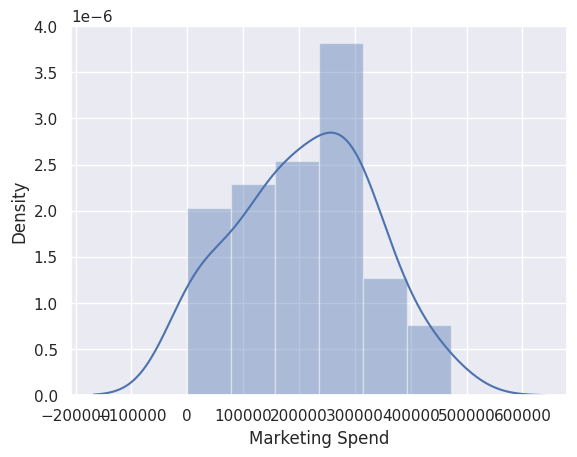

In [ ]:
sns.distplot(startup['Marketing Spend'])

<Axes: >

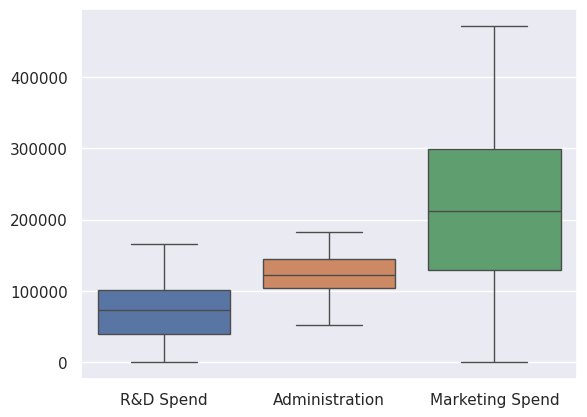

In [ ]:
sns.boxplot(data = startup[numerical_feature[:-1]])

In [ ]:
# No outlier detected in dataset

In [ ]:
# IQR for "R&D Spend"

q1 = startup['R&D Spend'].quantile(0.25)
q3 = startup['R&D Spend'].quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

61666.43
-52563.275
194102.445


In [ ]:
# IQR for "Administration"

q1 = startup['Administration'].quantile(0.25)
q3 = startup['Administration'].quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

41111.30499999999
42063.91750000001
206509.13749999998


In [ ]:
# IQR for "Marketing Spend"

q1 = startup['Marketing Spend'].quantile(0.25)
q3 = startup['Marketing Spend'].quantile(0.75)
iqr = q3 - q1
print(iqr)
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(lower_bound)
print(upper_bound)

170168.95249999996
-125953.29624999993
554722.5137499999


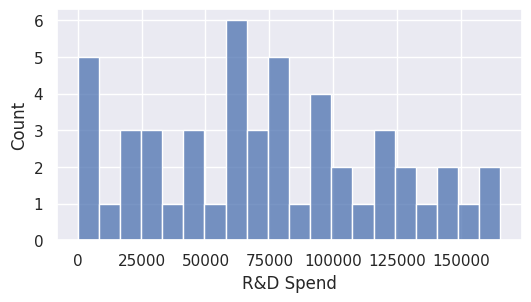

In [ ]:
#Histrogram with bins
plt.figure(figsize = (6,3))
sns.histplot(startup['R&D Spend'],bins = 20)
plt.show()

In [ ]:
#Now the distribution is changed which able to view peaks and trough for "R&D Spend"

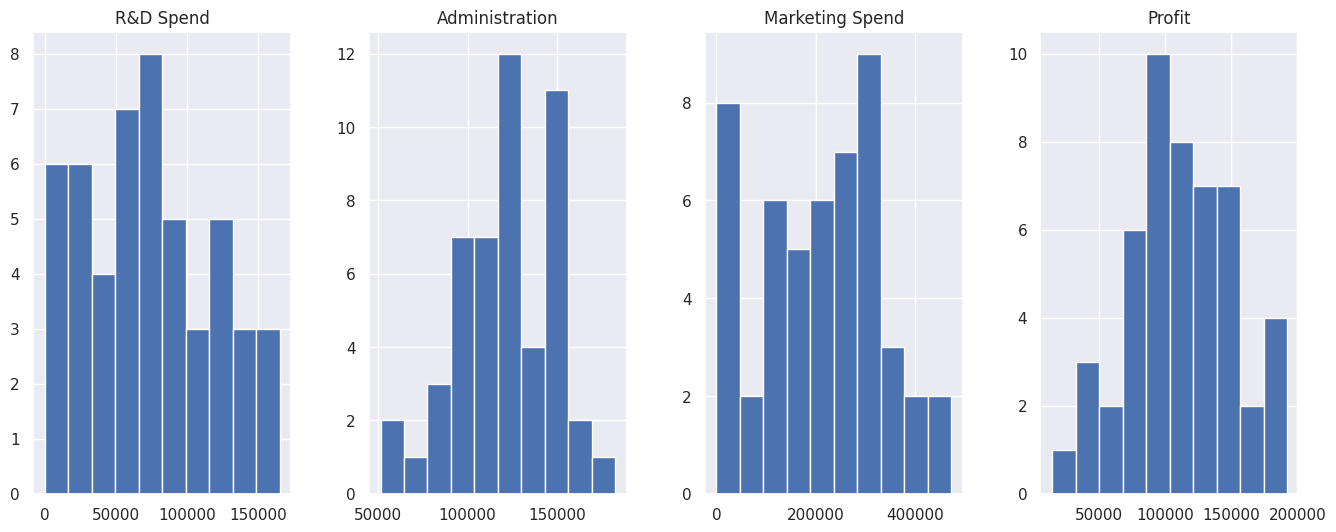

In [ ]:
# numerical Analysis

startup.hist(layout=(1,6), figsize=(25,6))
plt.show()

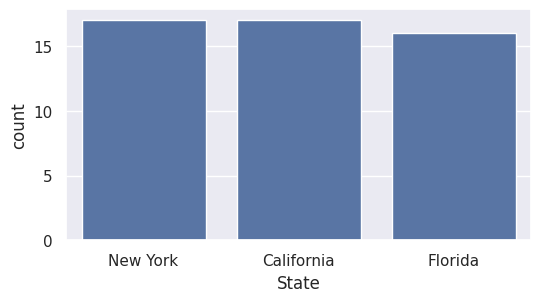

In [ ]:
# Categorical Analysis

plt.figure(figsize = (6,3))
sns.countplot(data=startup, x='State')
plt.show()


obs - The "State" distribution is no differnce in visualization

# Graphical Analysis

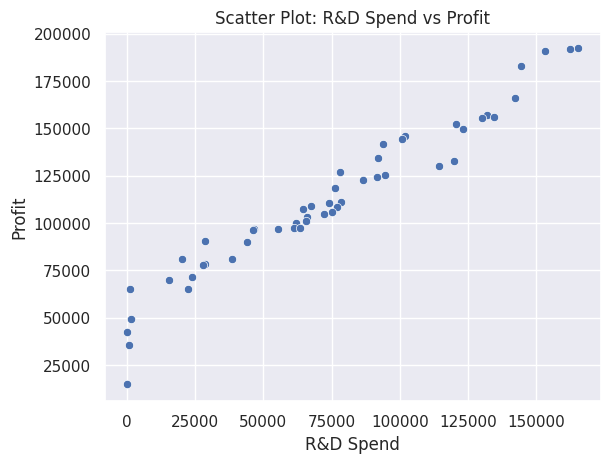

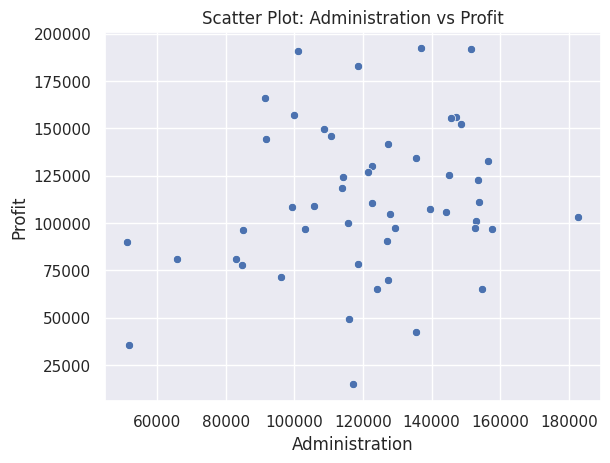

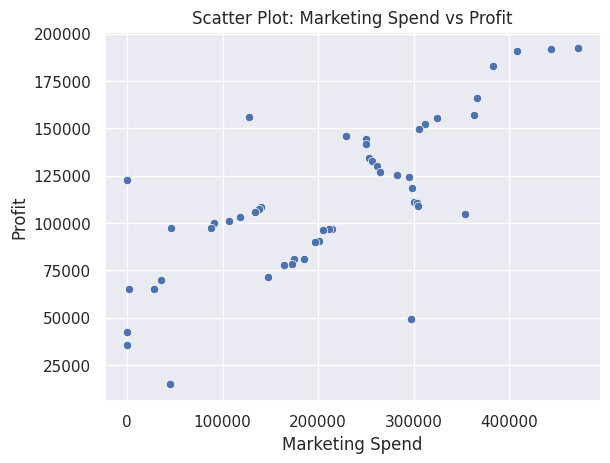

In [ ]:
for feature in numerical_feature:
    if feature != 'Profit':  # Skip Profit itself as an independent variable
        sns.scatterplot(data=startup, x=feature, y='Profit')
        plt.title(f'Scatter Plot: {feature} vs Profit')
        plt.xlabel(feature)
        plt.ylabel('Profit')
        plt.show()

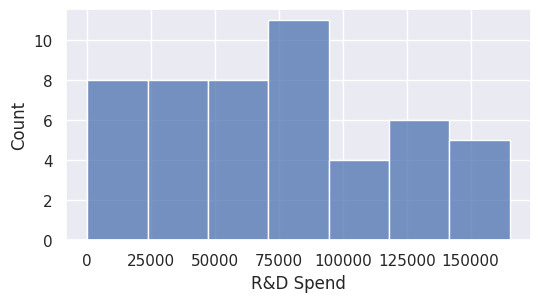

In [ ]:
plt.figure(figsize = (6,3))
sns.histplot(startup['R&D Spend'])
plt.show()

In [ ]:
# The histrogram is shows distribution of "R&D Spend" but have you noticed that the number of bins is random.

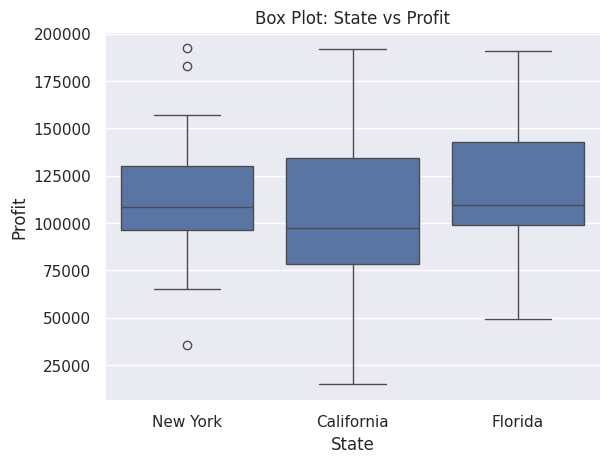

In [ ]:
# Bivariate Analysis

sns.boxplot(data=startup, x='State', y='Profit')
plt.title('Box Plot: State vs Profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

Mean Profit by State:
         State         Profit
0  California  103905.175294
1     Florida  118774.024375
2    New York  113756.446471


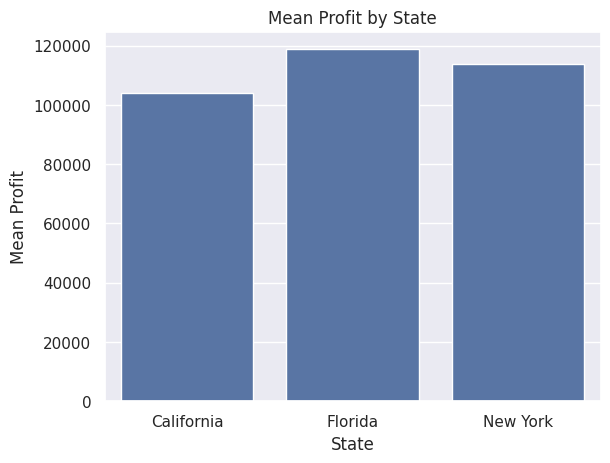

In [ ]:
grouped = startup.groupby('State')['Profit'].mean().reset_index()
print("Mean Profit by State:\n", grouped)

# Bar plot for grouped summary
sns.barplot(data=grouped, x='State', y='Profit')
plt.title('Mean Profit by State')
plt.xlabel('State')
plt.ylabel('Mean Profit')
plt.show()

<Axes: >

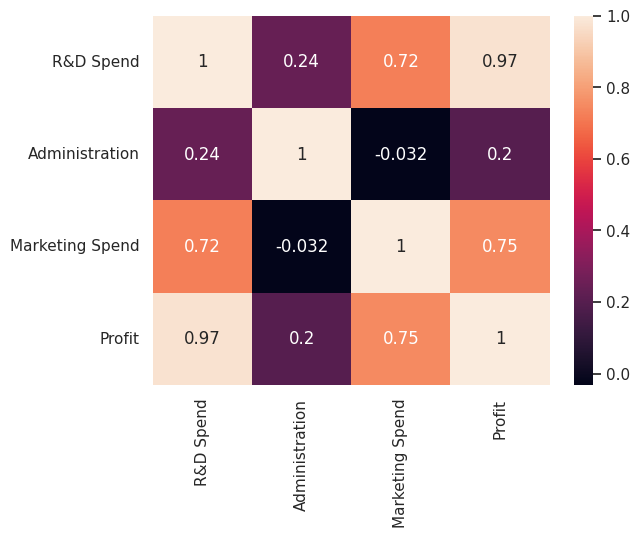

In [ ]:
sns.heatmap(startup[numerical_feature].corr(), annot = True)

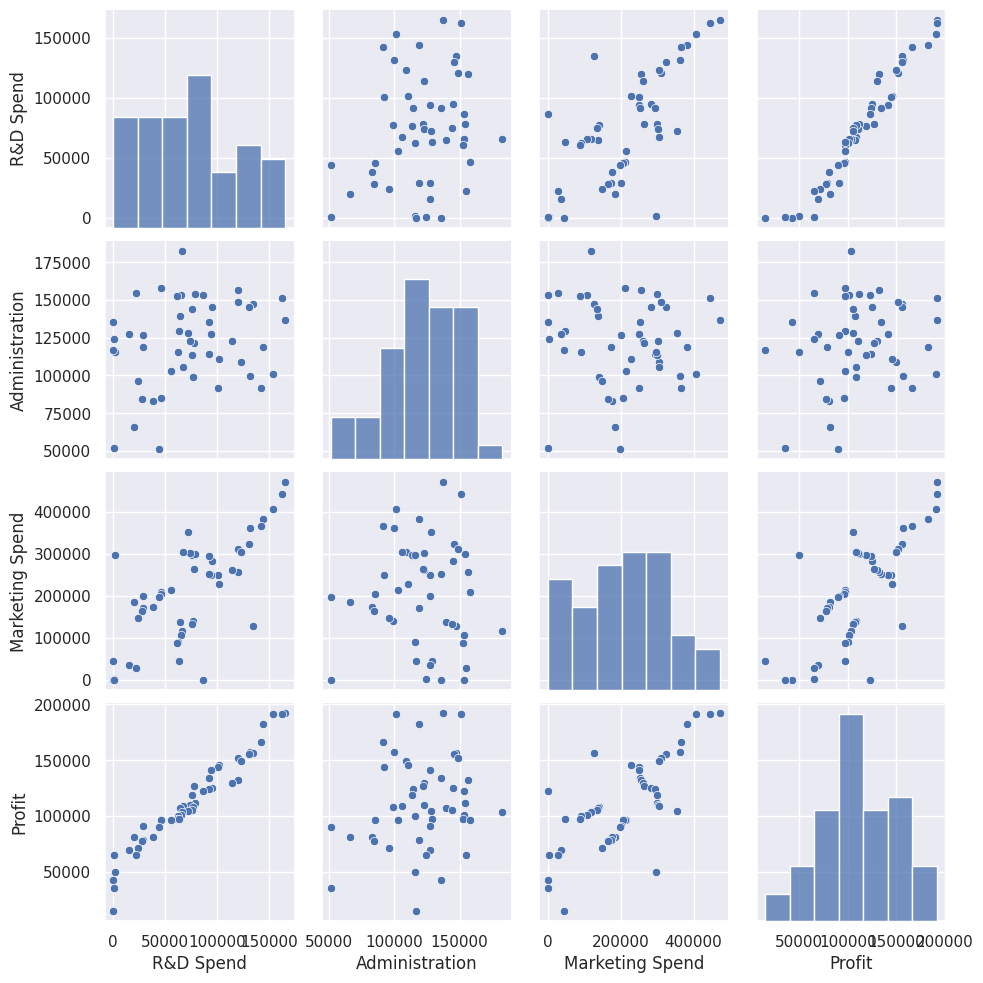

In [ ]:
sns.pairplot(startup[numerical_feature])

# Pre-Processing

In [ ]:
startup = pd.get_dummies(startup, columns=['State'], drop_first=True)

In [48]:
# Splitting the independent and dependent feature

X = startup.drop('Profit', axis=1).values  # Independent variables
y = startup['Profit'].values  # Dependent variable

In [ ]:
print(X.shape)
print(y.shape)

(50, 5)
(50,)


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [50]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
pred = lm.predict(x_test)

In [51]:
print(pred)

[112491.18347957  58226.04261297 113305.44259588 195074.28816876
 166054.83836183  72993.34608967 112080.9360798  116204.02108319
  45454.69306172  93887.59780833 109708.51036958  48763.68183897
 119712.97604037 146813.4899515  175475.26199122]


Backward Elimination Process:
The following steps are repeated until all p-values are below the chosen significance level (e.g., 0.05):
Fit the model with the current set of features.
Check p-values in the summary.
Remove the feature with the highest p-value > 0.05.
Refit the model and repeat.



In [61]:
import statsmodels.regression.linear_model as sm
# add a column of ones as integer data type
x = np.append(arr = np.ones((50, 1)).astype(float), values = X, axis = 1)
# choose a Significance level usually 0.05, if p>0.05
# for the highest values parameter, remove that value
x_opt = x[:, [0, 1, 2, 3, 4, 5]]
x_opt = x_opt.astype(np.float64)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           1.34e-27
Time:                        06:28:30   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1             0.8060      0.046     17.369      0.000       0.712       0.900
x2            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x3             0.0270      0.017      1.574      0.123      -0.008       0.062
x4           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x5           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
x_opt = x[:, [0, 1, 2, 3, 5]]
x_opt = x_opt.astype(np.float64)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           8.50e-29
Time:                        06:37:30   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.018e+04   6747.623      7.437      0.000    3.66e+04    6.38e+04
x1             0.8059      0.046     17.571      0.000       0.714       0.898
x2            -0.0269      0.052     -0.521      0.605      -0.131       0.077
x3             0.0271      0.017      1.625      0.111      -0.007       0.061
x4          -136.5042   2801.719     -0.049      0.961   -5779.456    5506.447
==============================================================================
Omnibus:                       14.892   Durbin-Watson:                   1.284
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.665
Skew:                          -0.949   Prob(JB):                     1.97e-05
Kurtosis:                       5.608   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
# remove the 5th column as it has the highest value
x_opt = x[:, [0, 1, 2, 3]]
x_opt = x_opt.astype(np.float64)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           4.53e-30
Time:                        06:40:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# remove the 3rd column as it has the highest value
x_opt = x[:, [0, 1, 2]]
x_opt = x_opt.astype(np.float64)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           7.29e-31
Time:                        06:41:23   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
x1             0.8621      0.030     28.589      0.000       0.801       0.923
x2            -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# remove the 2nd column as it has the highest value
x_opt = x[:, [0, 1]]
x_opt = x_opt.astype(np.float64)
ols = sm.OLS(endog = y, exog = x_opt).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Mon, 20 Jan 2025   Prob (F-statistic):           3.50e-32
Time:                        06:42:19   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""